In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
X_train.shape , X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[9]

'truck'

In [ ]:
def plt_sample(X, y, index):

 plt.figure(figsize = (15,2))
 plt.imshow(X_train[1])
 plt.xlabel(classes[y[index]])

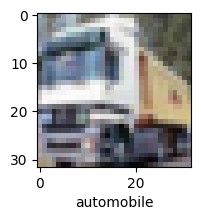

In [ ]:
plt_sample(X_train, y_train, 5)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
X_train = X_train/255
X_test = X_test/255

build simple ann for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 171s 109ms/step - loss: 1.8175 - accuracy: 0.3530
Epoch 2/5
1563/1563 [==============================] - 151s 97ms/step - loss: 1.6259 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.5432 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.4853 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 161s 103ms/step - loss: 1.4373 - accuracy: 0.4931


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 14s 44ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.32      0.45      1000
           1       0.65      0.59      0.62      1000
           2       0.30      0.55      0.39      1000
           3       0.41      0.19      0.26      1000
           4       0.58      0.19      0.28      1000
           5       0.38      0.38      0.38      1000
           6       0.56      0.49      0.52      1000
           7       0.37      0.72      0.49      1000
           8       0.55      0.70      0.62      1000
           9       0.56      0.55      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



Now let us build a convolutional neural network to train our image

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 92s 58ms/step - loss: 1.4812 - accuracy: 0.4679
Epoch 2/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1396 - accuracy: 0.6022
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0069 - accuracy: 0.6512
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9297 - accuracy: 0.6786
Epoch 5/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.8671 - accuracy: 0.6989
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8191 - accuracy: 0.7169
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7784 - accuracy: 0.7308
Epoch 8/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7423 - accuracy: 0.7438
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7048 - accuracy: 0.7548
Epoch 10/10
1563/1563 [==============================] - 74s 47m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9629 - accuracy: 0.6907


[0.9628791213035583, 0.6906999945640564]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 16ms/step


array([[5.54857892e-04, 6.50299189e-05, 3.74321290e-03, 9.62110698e-01,
        4.31246037e-04, 1.31989345e-02, 1.11995852e-02, 2.62108802e-06,
        8.68734997e-03, 6.37134917e-06],
       [2.05991101e-02, 8.25585499e-02, 5.54808094e-06, 2.44752641e-07,
        1.21465263e-07, 1.60501529e-07, 7.78176528e-08, 1.82986892e-09,
        8.96612108e-01, 2.23976822e-04],
       [4.48316932e-02, 4.88984615e-01, 8.99930659e-04, 2.94267409e-03,
        5.88793308e-04, 2.64103292e-03, 1.24012717e-04, 1.98048586e-03,
        3.56066823e-01, 1.00939803e-01],
       [8.78778338e-01, 8.33485276e-04, 7.28135137e-03, 1.01622558e-04,
        6.54132091e-05, 5.59580076e-06, 1.33056046e-05, 2.02171509e-06,
        1.12067044e-01, 8.51907243e-04],
       [1.13998731e-05, 7.04889069e-04, 4.12265845e-02, 5.70052713e-02,
        6.60818517e-01, 1.30974213e-02, 2.27053776e-01, 4.73652835e-06,
        7.63279459e-05, 1.03096136e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: ignored

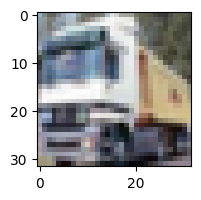

In [ ]:
plt_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'